Link to paper/exercises: https://arxiv.org/abs/1008.4686
#### 1) Using the standard linear algebra method of this section, fit the straight line $y = mx+b$ to the $x, y, \sigma_y$ values for data points 5 through 20 in Table 1 on page 6. Plot points, uncertainties, and best fit line. What is the uncertainty variance $\sigma_m^2$ on the slope of the line?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
#Data from Table 1:
xs = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
ys = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
sigma_ys = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

How do we fit data to a mean model? First, write down the log likelihood function:

$\mathcal{L}(m,b) = \sum_{i=1}^{\infty} \ln p(y_i|r_1,r_2, ...;x_i, \sigma_i)$ where $\{r_1, r_2, ...\}$are parameters of the mean model we are fitting to. For a straight line, we are fitting to the mean model $y = mx+b$, so these parameters are $\{m, b\}$. 

Then write down the probability of observing data point $y_i$ given the mean model and variance of data point $y_i$:

$p(y_i|...) = \mathcal{N}(y_i|mx_i+b, \sigma_i^2) = \frac{1}{\sqrt{2\pi\sigma_i^2}}e^{-\frac{1}{2\sigma_i^2}\left(y_i-[mx_i+b]\right)^2}$

Then the log of this probability is $\ln p(y_i|...) = -\frac{1}{2\sigma_i^2}(y_i-(mx_i+b))^2 + \ln ...$. We don't care about the constant term because we are going to optimize the log likelihood.

Then the log likelihood is $\mathcal{L} = -\frac{1}{2}\sum_{i=1}^{N}\frac{1}{\sigma_i^2}\left(y_i-[mx_i+b]\right)^2+constant$.

Putting this in matrix form, we get $\mathcal{L} = -\frac{1}{2}(Y-X\theta)^TC^{-1}(Y-X\theta)$.

Maximizing the log likelihood, we get $\hat{\theta} = (X^TC^{-1}X)^{-1}X^TC^{-1}Y$.

Realistically, we want to avoid taking inverses in our code, so we'll solve this form using scipy.linalg.solve:

$(X^TC^{-1}X)\hat{\theta} = X^TC^{-1}Y$

noting that scipy.linalg.solve solves the equation $AZ = B$ for $Z$. Also recall that for the diagonal matrix $C$, $C^{-1}$ is equal to taking the inverse of every element along the diagonal. Remember that diagonal matrices work like numbers in terms of operation rules!

The variance on $\hat{\theta}$ is given by the covariance matrix matrix $C_{\hat{\theta}} = (X^TC^{-1}X)^{-1}$. The diagonal elements are the variance of the b parameter and the slope parameter, from top to bottom respectively. 

In [3]:
# define Z, A, and B to plug into scipy.linalg.solve
#Z = theta_hat

#select data
data_xs = xs[4:]
data_ys = ys[4:]
data_sigma_ys = sigma_ys[4:]

X = np.vstack((data_xs, np.ones(len(data_xs)))).T
Y = np.expand_dims(data_ys, 1)
C_inv = np.zeros((len(data_xs), len(data_xs)))
np.fill_diagonal(C_inv, 1/data_sigma_ys**2)
A = (X.T@C_inv)@X
B = (X.T@C_inv)@Y

#solve
Z = linalg.solve(A, B)

#fit variance
A = (X.T@C_inv)@X
B = np.identity(A.shape[0])
Z_var = linalg.solve(A, B)
m_var = Z_var[1,1]

In [4]:
def linear(x, m, b):
    return m*x+b

In [5]:
#unpack parameters:
b = Z[0][0]
b_err = np.sqrt(Z_var[0][0])  
m = Z[1][0]
m_err = np.sqrt(Z_var[1][1])

In [6]:
print(f'The uncertainty variance of the slope line is {m_err**2}')

The uncertainty variance of the slope line is 332.92260104209987


Text(0, 0.5, 'y')

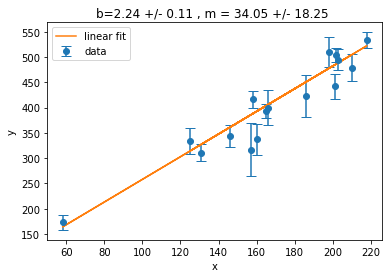

In [7]:
plt.errorbar(data_xs, data_ys, yerr = data_sigma_ys, linestyle = 'None', capsize=5, marker = 'o', label = 'data')
plt.plot(data_xs, linear(data_xs, *Z), label = 'linear fit')
plt.title(f'b={np.around(b,2)} +/- {np.around(b_err,2)} , m = {np.around(m,2)} +/- {np.around(m_err,2)} ')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

#### 2) Repeat Exercise 1 but for all the data points in Table 1 on pg 6. What is the uncertainty variance on the slope of the line? Is there anything you don't like about this result? Is there anything different about the new points we have included?

First let's make a function automating the linear fit:

In [8]:
def linear_fit(data_xs, data_ys, data_sigma_ys, print_variance = True):
    X = np.vstack((data_xs, np.ones(len(data_xs)))).T
    Y = np.expand_dims(data_ys, 1)
    C_inv = np.zeros((len(data_xs), len(data_xs)))
    np.fill_diagonal(C_inv, 1/data_sigma_ys**2)
    A = (X.T@C_inv)@X
    B = (X.T@C_inv)@Y

    #solve
    Z = linalg.solve(A, B)

    #fit variance
    A = (X.T@C_inv)@X
    B = np.identity(A.shape[0])
    Z_var = linalg.solve(A, B)
    
    #unpack data
    b = Z[0][0]
    b_err = np.sqrt(Z_var[0][0])  
    m = Z[1][0]
    m_err = np.sqrt(Z_var[1][1])
    
    if print_variance == True:
        print(f'The uncertainty variance of the slope line is {m_err**2}')
    return b, b_err, m, m_err

In [9]:
# Apply linear fit to full data set

b, b_err, m, m_err = linear_fit(xs, ys, sigma_ys)

The uncertainty variance of the slope line is 207.18818909008235


Text(0, 0.5, 'y')

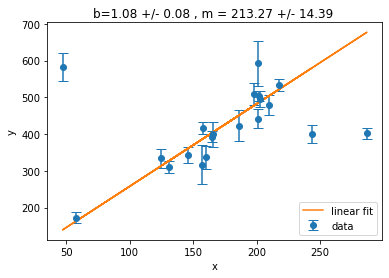

In [10]:
plt.errorbar(xs, ys, yerr = sigma_ys, linestyle = 'None', capsize=5, marker = 'o', label = 'data')
plt.plot(xs, linear(xs, *Z), label = 'linear fit')
plt.title(f'b={np.around(b,2)} +/- {np.around(b_err,2)} , m = {np.around(m,2)} +/- {np.around(m_err,2)} ')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

I don't like how the fit got worse but the uncertainty of the slope went down! The new points that are included are outliers.

#### 3) Generalize the standard fitting method to fit a general quadratic relationship. Add another column to matrix X and another element to vector $\theta$. Then redo Exercise 1 but for fitting and plotting the best quadratic relationship $g(x) = qx^2+mx+b$.

Follow the same approach as the linear case above. First, write down the log likelihood function:

$\mathcal{L}(m,b) = \sum_{i=1}^{\infty} \ln p(y_i|r_1,r_2, ...;x_i, \sigma_i)$ where $\{r_1, r_2, ...\}$are parameters of the mean model we are fitting to. For a quadratic relationship, we are fitting to the mean model $y = qx^2+mx+b$, so these parameters are $\{q, m, b\}$. 

Then write down the probability of observing data point $y_i$ given the mean model and variance of data point $y_i$:

$p(y_i|...) = \mathcal{N}(y_i|qx^2+mx+b, \sigma_i^2) = \frac{1}{\sqrt{2\pi\sigma_i^2}}e^{-\frac{1}{2\sigma_i^2}\left(y_i-[qx^2+mx+b]\right)^2}$

Then the log of this probability is $\ln p(y_i|...) = -\frac{1}{2\sigma_i^2}(y_i-(qx^2+mx+b))^2 + \ln ...$. We don't care about the constant term because we are going to optimize the log likelihood.

Then the log likelihood is $\mathcal{L} = -\frac{1}{2}\sum_{i=1}^{N}\frac{1}{\sigma_i^2}\left(y_i-[qx^2+mx+b]\right)^2+constant$.

Putting this in matrix form, we get $\mathcal{L} = -\frac{1}{2}(Y-X\theta)^TC^{-1}(Y-X\theta)$.

Maximizing the log likelihood, we get $\hat{\theta} = (X^TC^{-1}X)^{-1}X^TC^{-1}Y$.

Realistically, we want to avoid taking inverses in our code, so we'll solve this form using scipy.linalg.solve:

$(X^TC^{-1}X)\hat{\theta} = X^TC^{-1}Y$

noting that scipy.linalg.solve solves the equation $AZ = B$ for $Z$. Also recall that for the diagonal matrix $C$, $C^{-1}$ is equal to taking the inverse of every element along the diagonal. Remember that diagonal matrices work like numbers in terms of operation rules!

The variance on $\hat{\theta}$ is given by the covariance matrix matrix $C_{\hat{\theta}} = (X^TC^{-1}X)^{-1}$. The diagonal elements are the variance of the q parameter, the linear slope parameter, and the linear intercept parameter, from top to bottom respectively. 

In [11]:
def quadratic_fit(data_xs, data_ys, data_sigma_ys):
    X = np.vstack((data_xs**2, data_xs, np.ones(len(data_xs)))).T
    Y = np.expand_dims(data_ys, 1)
    C_inv = np.zeros((len(data_xs), len(data_xs)))
    np.fill_diagonal(C_inv, 1/data_sigma_ys**2)
    A = (X.T@C_inv)@X
    B = (X.T@C_inv)@Y

    #solve
    Z = linalg.solve(A, B)

    #fit variance
    A = (X.T@C_inv)@X
    B = np.identity(A.shape[0])
    Z_var = linalg.solve(A, B)
    
    #unpack data
    q = Z[0][0]
    q_err = np.sqrt(Z_var[0][0])  
    m = Z[1][0]
    m_err = np.sqrt(Z_var[1][1])
    b = Z[2][0]
    b_err = np.sqrt(Z_var[2][2]) 
    print(f'The uncertainty variance of the slope line is {m_err**2}')
    return q, q_err, b, b_err, m, m_err

In [12]:
def quadratic(x, q, m, b):
    return q*x**2+m*x+b

In [13]:
q, q_err, b, b_err, m, m_err = quadratic_fit(data_xs, data_ys, data_sigma_ys)

The uncertainty variance of the slope line is 0.33610764206836025


Text(0, 0.5, 'y')

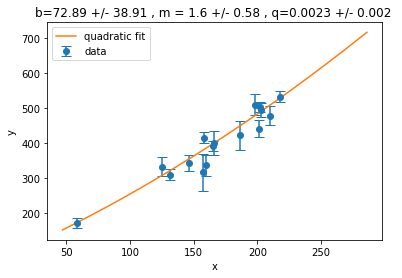

In [14]:
plt.errorbar(data_xs, data_ys, yerr = data_sigma_ys, linestyle = 'None', capsize=5, marker = 'o', label = 'data')
plt.plot(np.arange(np.min(xs), np.max(xs)), quadratic(np.arange(np.min(xs), np.max(xs)), q, m, b), \
         label = 'quadratic fit')
plt.title(f'b={np.around(b,2)} +/- {np.around(b_err,2)} , m = {np.around(m,2)} +/- {np.around(m_err,2)} , q={np.around(q,4)} +/- {np.around(q_err,4)} ')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

#### 8) Compute the uncertainty variance obtained for the slope of the line found by the fit done in 2). Now make jackknife (20 trials) and boostrap estimates for the uncertainty variance. Which uncertainty seems most reasonable?

The uncertainty variance of the slope line is 207.18818909008235


Text(0, 0.5, 'y')

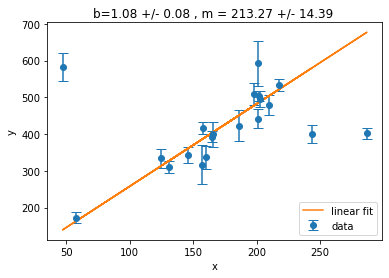

In [15]:
# recall exercise 2:

# Apply linear fit to full data set

b, b_err, m, m_err = linear_fit(xs, ys, sigma_ys)

plt.errorbar(xs, ys, yerr = sigma_ys, linestyle = 'None', capsize=5, marker = 'o', label = 'data')
plt.plot(xs, linear(xs, *Z), label = 'linear fit')
plt.title(f'b={np.around(b,2)} +/- {np.around(b_err,2)} , m = {np.around(m,2)} +/- {np.around(m_err,2)} ')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Now implement jackknife:
For each $i\in [n]$ we compute the desired statistic of the jackknife subsample consisting of all but the i-th data point, and this is called the $i$-th jackknife replicate. Then we take the variance of these collected statistics to get the variance estimate of the statistic. Source: https://en.wikipedia.org/wiki/Jackknife_resampling

In [16]:
def jackknife_linear_fit(data_xs, data_ys, data_sigma_ys, replicates = 20):
    ms = []
    bs = []
    for i in range(replicates):
        xs = np.delete(data_xs, i)
        ys = np.delete(data_ys, i)
        sigma_ys = np.delete(data_sigma_ys, i)
        b, b_err, m, m_err = linear_fit(xs, ys, sigma_ys, print_variance = False)
        ms.append(m)
        bs.append(b)
    bvar = np.var(bs)
    mvar = np.var(ms)
    return bvar, mvar    

In [17]:
bvar, mvar = jackknife_linear_fit(xs, ys, sigma_ys, replicates = 20)

In [18]:
print(f'Using jackknife, the uncertainty variance on b is {np.around(bvar,4)}, while the uncertainty variance on m is {np.around(mvar,4)}')

Using jackknife, the uncertainty variance on b is 0.0402, while the uncertainty variance on m is 1264.2625


Now implement bootstrap:
For each $i\in [n]$ we compute the desired statistic of the bootstrap sample consisting of $N$ data points sampled from the data length $N$ with replacement. Then we take the variance of these collected statistics to get the variance estimate of the statistic.
Source: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

In [19]:
def bootstrap_linear_fit(data_xs, data_ys, data_sigma_ys, replicates = 100):
    ms = []
    bs = []
    for i in range(replicates):
        indices = np.random.randint(0, len(data_xs), size = len(data_xs))
        xs = data_xs[indices]
        ys = data_ys[indices]
        sigma_ys = data_sigma_ys[indices]
        b, b_err, m, m_err = linear_fit(xs, ys, sigma_ys,print_variance = False)
        ms.append(m)
        bs.append(b)
    bvar = np.var(bs)
    mvar = np.var(ms)
    return bvar, mvar   

In [20]:
bvar, mvar = bootstrap_linear_fit(xs, ys, sigma_ys, replicates = 100)

In [21]:
print(f'Using bootstrap, the uncertainty variance on b is {np.around(bvar,4)}, while the uncertainty variance on m is {np.around(mvar,4)}')

Using bootstrap, the uncertainty variance on b is 0.3696, while the uncertainty variance on m is 11738.3126


I trust bootstrapping the most out of all these uncertainties! Adding those 4 outliers should increase the fit uncertainty by a lot.